### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 24th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [3]:
#importing tools
import numpy as np
import scipy
import matplotlib.pyplot as plt

#### Part 1

In [4]:
#reading data
data1 = np.load('/home/nowickr/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_1.npy')

In [91]:
#saving data columns as variables
Volt = data1[:,0]
V_unc = data1[:,1]

In [92]:
#Computing sample mean of data
mean_dat1 = np.sum(Volt/(V_unc**2)) / np.sum(1/(V_unc**2))          #eq from lecture 5

#Computing standard error of sample mean of data
stderr_dat1 = (np.sum(1/(V_unc**2)))**(-1/2)                        #eq from lecture 5

print('Sample Mean:', mean_dat1, 'Volts')
print('Standard Error on the Sample Mean:', stderr_dat1, 'Volts')

Sample Mean: 4.942118214425304 Volts
Standard Error on the Sample Mean: 0.43024334605205083 Volts


#### Part 2

In [93]:
#Fit the log likelihood function and determine the best-fit mean voltage
mugrid = np.linspace(0,8,1000)


In [94]:
#defining function
def lnL(data,mu,sigma):
    lnLgrid = []
    for i in mu:
        lnLma = (1/2)*np.sum((data-i)**2/(sigma**2))
        lnLgrid.append(lnLma)
    return lnLgrid

In [95]:
#fining optimal mu using lambda function and scipy optimize
lnLopt = lambda x: lnL(data=Volt,mu=x,sigma=V_unc)

output = scipy.optimize.fmin(lnLopt,3)
print('Optimal Mean:', output)

Optimization terminated successfully.
         Current function value: 2.807251
         Iterations: 17
         Function evaluations: 34
Optimal Mean: [4.94208984]


#### Part 3

$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

In [126]:
#3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) 
# for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

#making the uniform prior for the mean
prior = scipy.stats.uniform(loc=3,scale=4)
prior_grid = np.linspace(3,7,1000)      #test values of sample mean

#defining a function for the (not log) likelihood
def L_notln(data,mu,sigma):
    L_arr = []  #empty array of likelihood values
    for i in mu:
        L = np.prod((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(data-i)**2/(2*(sigma)**2))) #calculating likelihood
        L_arr.append(L)
    return L_arr

In [127]:
#computing the likelihood using the above (not log) likelihood funciton
Like = L_notln(Volt,testmu,V_unc)

print(Like)

[7.520116886254476e-18, 8.272554882257406e-18, 9.098506141399274e-18, 1.000497245822514e-17, 1.0999604542845111e-17, 1.2090760411733015e-17, 1.3287568866356398e-17, 1.459999848755094e-17, 1.6038932608154225e-17, 1.7616250763689775e-17, 1.9344917161038073e-17, 2.1239076748266175e-17, 2.3314159515320982e-17, 2.558699370537984e-17, 2.807592867053916e-17, 3.080096816348555e-17, 3.3783914919134973e-17, 3.7048527447234924e-17, 4.062069002895997e-17, 4.4528596987928655e-17, 4.8802952389212847e-17, 5.347718640921372e-17, 5.858768971514636e-17, 6.417406729579295e-17, 7.027941329562328e-17, 7.695060852284976e-17, 8.423864242908103e-17, 9.219896149447237e-17, 1.0089184609834609e-16, 1.1038281811179331e-16, 1.2074308161645296e-16, 1.3204999933333153e-16, 1.443876075378467e-16, 1.578471724432134e-16, 1.7252779125466638e-16, 1.8853704133281096e-16, 2.059916811565861e-16, 2.250184070460719e-16, 2.4575466989365953e-16, 2.6834955646030134e-16, 2.929647401227963e-16, 3.19775506309766e-16, 3.489718582395

In [128]:
#computing the normalization for the posterior, also known as the evidence
Evid = np.sum(Like) #we normalize to 1, so summing over all points gives us the cumulative

In [129]:
#computing posterior probability
post = Like * prior.pdf(prior_grid) / Evid

print(post)

[9.76134433e-14 1.07380321e-13 1.18101424e-13 1.29867637e-13
 1.42778269e-13 1.56941810e-13 1.72476754e-13 1.89512496e-13
 2.08190306e-13 2.28664384e-13 2.51103008e-13 2.75689786e-13
 3.02625002e-13 3.32127093e-13 3.64434238e-13 3.99806094e-13
 4.38525666e-13 4.80901346e-13 5.27269121e-13 5.77994962e-13
 6.33477418e-13 6.94150421e-13 7.60486335e-13 8.32999244e-13
 9.12248523e-13 9.98842701e-13 1.09344364e-12 1.19677104e-12
 1.30960737e-12 1.43280312e-12 1.56728255e-12 1.71404984e-12
 1.87419581e-12 2.04890512e-12 2.23946410e-12 2.44726911e-12
 2.67383574e-12 2.92080853e-12 3.18997163e-12 3.48326025e-12
 3.80277295e-12 4.15078498e-12 4.52976266e-12 4.94237880e-12
 5.39152940e-12 5.88035163e-12 6.41224319e-12 6.99088314e-12
 7.62025438e-12 8.30466782e-12 9.04878838e-12 9.85766300e-12
 1.07367508e-11 1.16919553e-11 1.27296596e-11 1.38567634e-11
 1.50807237e-11 1.64095978e-11 1.78520895e-11 1.94175998e-11
 2.11162797e-11 2.29590881e-11 2.49578537e-11 2.71253407e-11
 2.94753207e-11 3.202264

Text(0, 0.5, 'Normalized Posterior Probability')

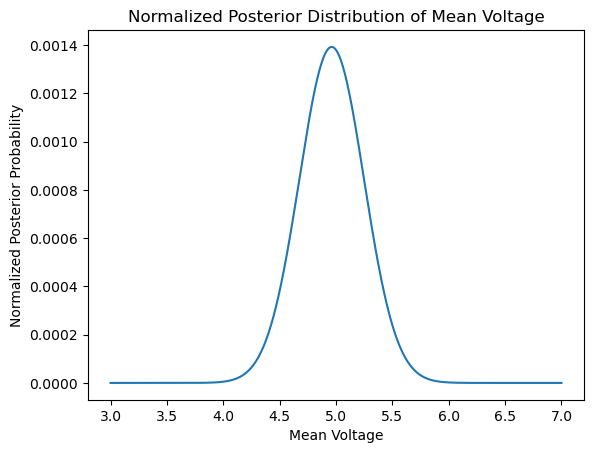

In [133]:
#plotting posterior probability
plt.plot(prior_grid,post)
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

#### Part 4

In [ ]:
#By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean
# and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

#random sampling of posterior = meaning randdomly selecting mus weighted by post

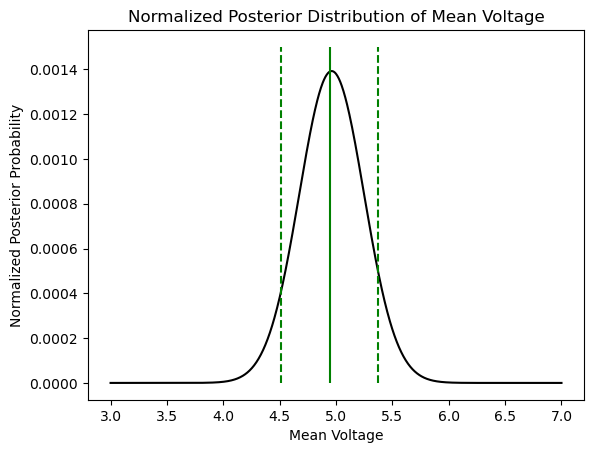

In [144]:
#new plot with credible region and analytic sample mean/stderr plotted too

#first recreate posterior distibution
plt.plot(prior_grid,post, color='k')
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

#plotting credible region

#plotting vertical lines of analytic sample mean +/- standard error
plt.vlines(mean_dat1,0,0.0015, color='g') #vertical line at analytic sample mean
plt.vlines(mean_dat1+stderr_dat1,0,0.0015, color='g', linestyles="dashed") #vertical lines one standard error away (positive) from analytic sample mean
plt.vlines(mean_dat1-stderr_dat1,0,0.0015, color='g', linestyles="dashed") #vertical lines one standard error away (negative) from analytic sample mean

#### Part 5

#### Part 6

#### Part 7

In [ ]:
#plotting results from 3,5,6
xgrid = np.linspace(0,10,1000)

plt.plot(xgrid, res1)
plt.plot(xgrid, res2)
plt.plot(xgrid, res3)
plt.xlabel('$\mu$')
plt.ylabel('Normalized Posterior Probability Density')
plt.xlim(0,10)

#### Part 8

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [15]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

#### Part 1

In [13]:
#reading data
data2 = np.load('/home/nowickr/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_2.npy')

#setting columns as variables
x, y, sigma_y = data2

In [14]:
print('x:', x)
print('y:', y)

x: [0.42 0.72 0.   0.3  0.15 0.09 0.19 0.35 0.4  0.54 0.42 0.69 0.2  0.88
 0.03 0.67 0.42 0.56 0.14 0.2 ]
y: [ 0.33  0.41 -0.25  0.01 -0.05 -0.05 -0.12  0.26  0.29  0.39  0.31  0.42
 -0.01  0.58 -0.2   0.52  0.15  0.32 -0.13 -0.09]


#### Part 2

In [ ]:
#using provided functions to compute:

#polynomial fit


#log likelihood

#### Part 3

#### Part 4

#### Part 5

#### Part 6